In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Fuel.csv")
print("The shape of given dataset is ", df.shape)

The shape of given dataset is  (946, 15)


In [3]:
col_names = ["Year", "Make", "Model", "Vehicle", "Engine", "Cylinders", "Transmission", "Fuel", "FC_City", "FC_Hwy", "FC_Comb_L", "FC_Comb_Mpg", "Emission", "CO2", "Smog"]
df.columns = col_names

df.columns

Index(['Year', 'Make', 'Model', 'Vehicle', 'Engine', 'Cylinders',
       'Transmission', 'Fuel', 'FC_City', 'FC_Hwy', 'FC_Comb_L', 'FC_Comb_Mpg',
       'Emission', 'CO2', 'Smog'],
      dtype='object')

In [4]:
sample_df = pd.get_dummies(df,columns=["Make", "Model", "Vehicle", "Transmission", "Fuel"])

In [5]:
sample_df.drop(columns="Year", inplace=True, axis=1)
sample_df

,Engine,Cylinders,FC_City,FC_Hwy,FC_Comb_L,FC_Comb_Mpg,Emission,CO2,Smog,Make_Acura,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,2.4,4,9.9,7.0,8.6,33,200,6,3,1,...,0,0,0,0,0,0,0,0,0,1
1,3.5,6,12.6,9.4,11.2,25,263,4,5,1,...,0,0,0,0,0,0,0,0,0,1
2,2.0,4,11.0,8.6,9.9,29,232,5,6,1,...,0,0,0,0,0,0,0,0,0,1
3,2.0,4,11.3,9.1,10.3,27,242,5,6,1,...,0,0,0,0,0,0,0,0,0,1
4,2.0,4,11.2,8.0,9.8,29,230,5,7,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2.0,4,10.7,7.7,9.4,30,219,5,5,0,...,0,0,0,0,0,0,0,0,0,1
942,2.0,4,10.5,8.1,9.4,30,219,5,5,0,...,0,0,0,0,0,0,0,0,0,1
943,2.0,4,11.0,8.7,9.9,29,232,5,7,0,...,0,0,0,0,0,0,0,0,0,1
944,2.0,4,11.5,8.4,10.1,28,236,5,5,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
X = sample_df.drop(['CO2'], axis=1).values
Y = sample_df['CO2'].values

In [7]:
Y = Y.reshape((len(Y), 1))

In [8]:
from sklearn.preprocessing import OneHotEncoder
he = OneHotEncoder()
Y = he.fit_transform(Y).toarray()

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

X_train (662, 803)
Y_train (662, 10)
X_test (284, 803)
Y_test (284, 10)


In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
ip = X_train.shape[1]

In [27]:
model = Sequential()
model.add(Dense(550, activation='relu', input_dim = ip))
#model.add(Dense(550,  activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
history = model.fit(X_train, Y_train,batch_size=32, epochs=50, validation_data=(X_test,Y_test))

Epoch 1/50
21/21 [==============================] - 2s 47ms/step - loss: 6.9949 - accuracy: 0.2538 - val_loss: 2.8471 - val_accuracy: 0.2676
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 1.9522 - accuracy: 0.4048 - val_loss: 1.7080 - val_accuracy: 0.4049
Epoch 3/50
21/21 [==============================] - 0s 20ms/step - loss: 1.3357 - accuracy: 0.5060 - val_loss: 1.4168 - val_accuracy: 0.4930
Epoch 4/50
21/21 [==============================] - 0s 22ms/step - loss: 1.1470 - accuracy: 0.5816 - val_loss: 1.1740 - val_accuracy: 0.5775
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.8360 - accuracy: 0.7024 - val_loss: 1.0119 - val_accuracy: 0.6021
Epoch 6/50
21/21 [==============================] - 0s 17ms/step - loss: 0.7610 - accuracy: 0.7749 - val_loss: 0.9912 - val_accuracy: 0.6831
Epoch 7/50
21/21 [==============================] - 0s 19ms/step - loss: 0.7928 - accuracy: 0.7628 - val_loss: 1.1538 - val_accuracy: 0.5634
Epoch 8/50
21

In [30]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Recall score: %.3f" % recall_score(test, pred,average='weighted',zero_division=1))
print("F1 score: %.3f" % f1_score(test, pred,average='weighted',zero_division=1))
print('Precision Score: %.3f' % precision_score(test, pred,average='weighted',zero_division=1))

Recall score: 0.757
F1 score: 0.747
Precision Score: 0.783


c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Sundas.Mohsin\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


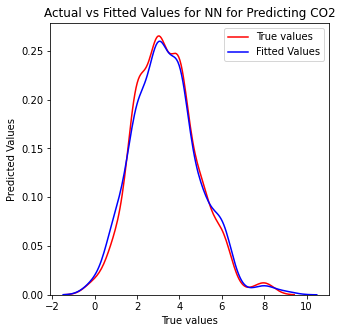

In [80]:
plt.figure(figsize=(5,5))
ax1 = sns.distplot(test, hist=False, color = "r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.title("Actual vs Fitted Values for NN for Predicting CO2")
plt.xlabel("True values")
plt.ylabel("Predicted Values")
plt.legend(["True values", "Fitted Values"])
plt.show()